In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from astropy import units as u

sol_to_earth = 332946.078
AU = 1.496e+13 #cm
M_sun = 1.989e+33 #g
G = 6.6743* 10**(-11) #N⋅m2/kg2

m_pl = 2.7932451e-8 * M_sun / 10**3 # kg, Mass of each planetesimal
m_emb = 2.7932451e-7 * M_sun / 10**3  # solMass, Mass of each planetary embryo
r_emb = 2.39e-5 * AU * 10**(-2) #m, radius of embryo
r_pl = 1.11e-5 * AU * 10**(-2) #m, radius of planetesimal
m_min = 0.5 * m_pl

In [2]:
r_t = (m_emb/(4/3 * np.pi * 3000))**(1/3)
print(r_t)

3535992.3890973562


In [3]:
print(r_emb)

print(r_t - r_emb)

3575440.0
-39447.61090264376


In [4]:
def get_Qs(d, m_t, m_p, rho, theta): #d in AU, m_t and m_p in kg, rho in kg/m^3, theta in radians
    v_rel = np.sqrt((G*M_sun/10**3)/(d *(AU * 10**-2))) #m/s
    r_t = (m_t/(4/3 * np.pi * rho))**(1/3)
    r_p = (m_p/(4/3 * np.pi * rho))**(1/3)
    M_tot = m_t + m_p
    R_tot = r_t + r_p
    b = R_tot * np.sin(theta)
    x_rel = R_tot * np.cos(theta)
    v_esc = np.sqrt(2*G*M_tot/R_tot)
    v_i = np.sqrt(v_rel**2 - 2*G*M_tot*(1/x_rel - 1/R_tot))
    
    Cstar = 1.8
    rho_1 = 1000
    R_1 = (M_tot/(4/3*np.pi*rho_1))**(1/3)
    mu = (m_t*m_p)/(M_tot)
    
    gamma = m_p/m_t
    l = R_tot*(1-np.sin(theta)) #Childs and Steffen 2022
    alpha = (3*r_p*l**2 - l**3)/(4*r_p**3) #Childs and Steffen 2022
    mu_alpha = alpha*m_p*m_t/(m_t + alpha*m_p)
    Q = (mu * v_i**2)/(2*M_tot)
    Q_0 = 0.8 * Cstar * np.pi * rho_1 * G * R_1**2
    Q_star = Q_0 * ((1+gamma)**2/(4*gamma)) * (mu/mu_alpha)**(3/2)
    Q_esc = (mu * v_esc**2)/(2*M_tot)
    merge_thresh = 2 * m_min/M_tot
    
    
    c1 = 2.43
    c2 = -0.0408
    c3 = 1.86
    c4 = 1.08
    phi = theta
    Gamma = ((1-gamma)/(1+gamma))**2
    v_cr = v_esc * (  c1*Gamma*(1-np.sin(phi))**(5/2) + c2*Gamma + c3*Gamma*(1-np.sin(phi))**(5/2) + c4  )
    Q_cr = (mu * v_cr**2)/(2*M_tot)

    return Q, Q_star, Q_esc, Q_cr, merge_thresh, v_i/v_esc, v_cr/v_esc, b, mu/mu_alpha
    

In [5]:
theta = np.linspace(0,np.pi/2 - np.pi/50, 100)
Q, Q_star, Q_esc, Q_cr, merge_thresh, v_i_esc, v_cr_v_esc, b, mu_ratio = get_Qs(2, m_emb, m_pl, 3000, theta)

/tmp/ipykernel_175819/3000159911.py:23: RuntimeWarning: invalid value encountered in power
  Q_star = Q_0 * ((1+gamma)**2/(4*gamma)) * (mu/mu_alpha)**(3/2)


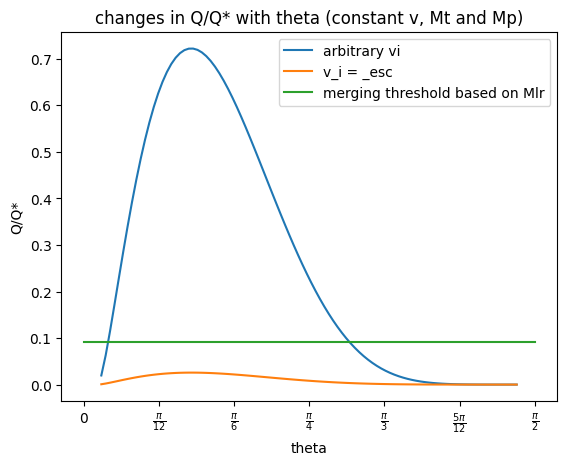

In [6]:
plt.plot(theta, Q/Q_star, label = 'arbitrary vi')
plt.plot(theta, Q_esc/Q_star, label = 'v_i = _esc')

ticks = [0, np.pi/12, np.pi/6, np.pi/4, np.pi/3, np.pi/3+np.pi/12, np.pi/2]  # Desired tick positions
tick_labels = [r"$0$", r"$\frac{\pi}{12}$", r"$\frac{\pi}{6}$", r"$\frac{\pi}{4}$", r"$\frac{\pi}{3}$",r"$\frac{5\pi}{12}$", r"$\frac{\pi}{2}$"]  # Labels
plt.xticks(ticks, tick_labels)

plt.plot([0,np.pi/2], [merge_thresh,merge_thresh], label = 'merging threshold based on Mlr')

plt.legend()
plt.xlabel('theta')
plt.ylabel('Q/Q*')

plt.title('changes in Q/Q* with theta (constant v, Mt and Mp)')
plt.show()

In [13]:
m_pl

5.5557645039000005e+22

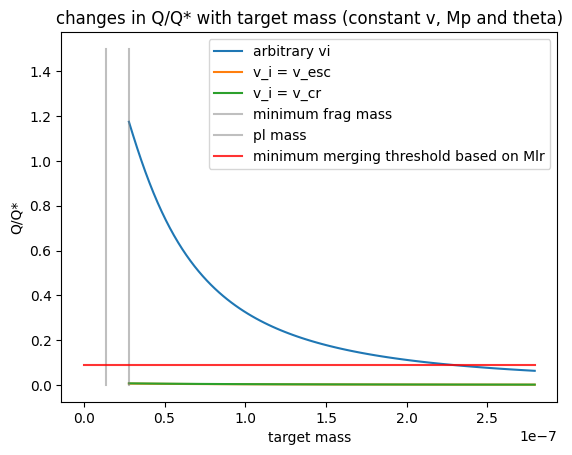

In [20]:
#theta = [0, np.pi/6, np.pi/4, np.pi/3, np.pi * 5/12, np.pi/2]
theta = np.pi/3
m_target = np.linspace(m_pl, m_emb, 100)
Q1, Q1_star, Q1_esc, Q1_cr, merge_thresh1, v_i_esc, v_cr_v_esc, b, mu_ratio = get_Qs(1, m_target, m_pl, 3000, theta)

plt.plot(m_target/(M_sun/10**3), Q1/Q1_star, label = 'arbitrary vi')
plt.plot(m_target/(M_sun/10**3), Q1_esc/Q1_star, label = 'v_i = v_esc')
plt.plot(m_target/(M_sun/10**3), Q1_cr/Q1_star, label = 'v_i = v_cr')

plt.plot([(0.5 * m_pl)/(M_sun/10**3), (0.5 * m_pl)/(M_sun/10**3)], [0,1.5], color = 'grey', alpha = 0.5, label = 'minimum frag mass')
plt.plot([(m_pl)/(M_sun/10**3), (m_pl)/(M_sun/10**3)], [0,1.5], color = 'grey', alpha = 0.5, label = 'pl mass')

plt.plot([0,(m_emb)/(M_sun/10**3)], [np.min(merge_thresh1),np.min(merge_thresh1)], alpha = 0.8, color = 'red', label = 'minimum merging threshold based on Mlr')

plt.legend()
plt.xlabel('target mass')
plt.ylabel('Q/Q*')

plt.title('changes in Q/Q* with target mass (constant v, Mp and theta)')

plt.show()

/tmp/ipykernel_175819/3000159911.py:23: RuntimeWarning: invalid value encountered in power
  Q_star = Q_0 * ((1+gamma)**2/(4*gamma)) * (mu/mu_alpha)**(3/2)


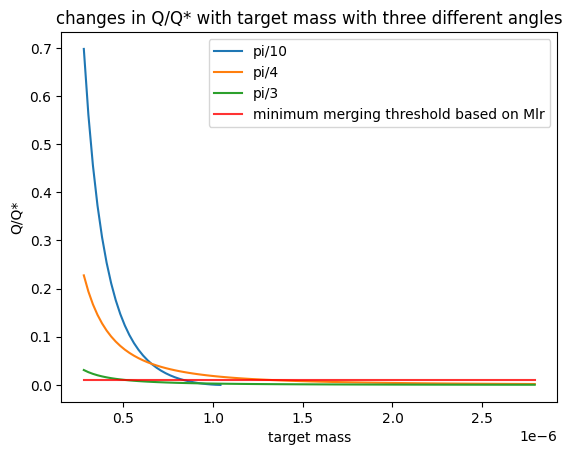

In [8]:
#theta = [0, np.pi/6, np.pi/4, np.pi/3, np.pi * 5/12, np.pi/2]
theta = np.pi/3
m_target = np.linspace(m_emb, 10*m_emb, 100)
Q1, Q1_star, Q1_esc, Q1_cr, merge_thresh1, v_i_esc, v_cr_v_esc, b, mu_ratio = get_Qs(2, m_target, m_pl, 3000, np.pi/10)
Q2, Q2_star, Q2_esc, Q2_cr, merge_thresh2, v_i_esc, v_cr_v_esc, b, mu_ratio = get_Qs(2, m_target, m_pl, 3000, np.pi/4)
Q3, Q3_star, Q3_esc, Q3_cr, merge_thresh3, v_i_esc, v_cr_v_esc, b, mu_ratio = get_Qs(2, m_target, m_pl, 3000, np.pi/3)

plt.plot(m_target/(M_sun/10**3), Q1/Q1_star, label = 'pi/10')
plt.plot(m_target/(M_sun/10**3), Q2/Q2_star, label = 'pi/4')
plt.plot(m_target/(M_sun/10**3), Q3/Q3_star, label = 'pi/3')
#plt.plot(m_target/(M_sun/10**3), Q1_esc/Q1_star, label = 'v_i = v_esc')
#plt.plot(m_target/(M_sun/10**3), Q1_cr/Q1_star, label = 'v_i = v_cr')


plt.plot([(1 * m_emb)/(M_sun/10**3),(10 * m_emb)/(M_sun/10**3)], [np.min(merge_thresh1),np.min(merge_thresh1)], alpha = 0.8, color = 'red', label = 'minimum merging threshold based on Mlr')

plt.legend()
plt.xlabel('target mass')
plt.ylabel('Q/Q*')

plt.title('changes in Q/Q* with target mass with three different angles')


plt.show()

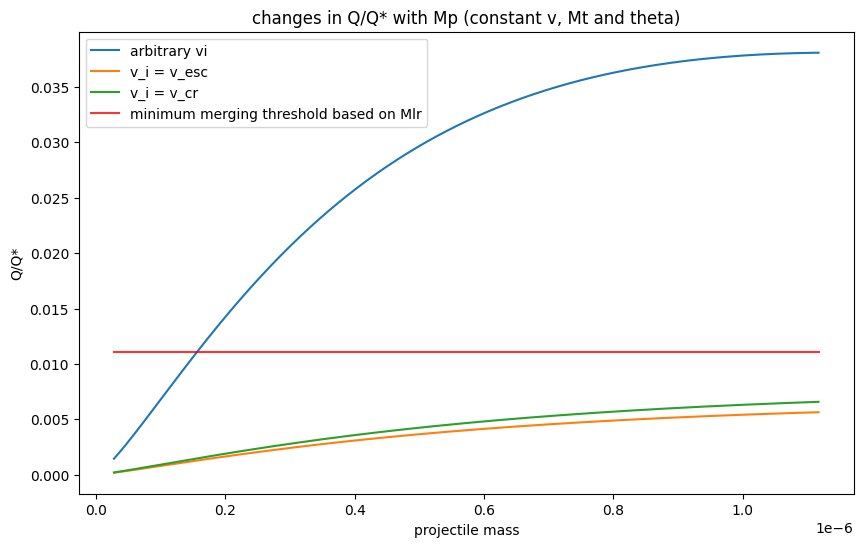

In [9]:
plt.figure(figsize=(10,6))
#theta = [0, np.pi/6, np.pi/4, np.pi/3, np.pi * 5/12, np.pi/2]
theta = np.pi/3
m_projectile = np.linspace(0.1* m_emb, 4*m_emb, 1000)
Q1, Q1_star, Q1_esc, Q1_cr, merge_thresh1, v_i_esc, v_cr_v_esc, b, mu_ratio = get_Qs(2, 5*m_emb, m_projectile, 3000, theta)

plt.plot(m_projectile/(M_sun/10**3), Q1/Q1_star, label = 'arbitrary vi')
plt.plot(m_projectile/(M_sun/10**3), Q1_esc/Q1_star, label = 'v_i = v_esc')
plt.plot(m_projectile/(M_sun/10**3), Q1_cr/Q1_star, label = 'v_i = v_cr')


plt.plot([np.min(m_projectile)/(M_sun/10**3), np.max(m_projectile)/(M_sun/10**3)], [np.min(merge_thresh1),np.min(merge_thresh1)], alpha = 0.8, color = 'red', label = 'minimum merging threshold based on Mlr')

plt.title('changes in Q/Q* with Mp (constant v, Mt and theta)')


plt.legend()
plt.xlabel('projectile mass')
plt.ylabel('Q/Q*')
plt.show()

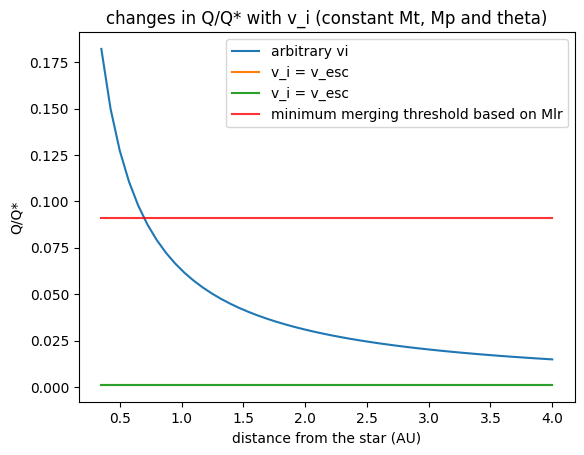

In [10]:
#theta = [0, np.pi/6, np.pi/4, np.pi/3, np.pi * 5/12, np.pi/2]
theta = np.pi/3
distance = np.linspace(0.35,4)
Q1, Q1_star, Q1_esc, Q1_cr, merge_thresh1, v_i_esc, v_cr_v_esc, b, mu_ratio = get_Qs(distance, m_emb, m_pl, 3000, theta)

plt.plot(distance, Q1/Q1_star, label = 'arbitrary vi')
plt.plot([np.min(distance), np.max(distance)], [Q1_esc/Q1_star,Q1_esc/Q1_star], label = 'v_i = v_esc')
plt.plot([np.min(distance), np.max(distance)], [Q1_cr/Q1_star,Q1_cr/Q1_star], label = 'v_i = v_esc')
#plt.plot(distance, Q1_cr/Q1_star, label = 'v_i = v_cr')


plt.plot([np.min(distance), np.max(distance)], [merge_thresh1,merge_thresh1], alpha = 0.8, color = 'red', label = 'minimum merging threshold based on Mlr')


plt.title('changes in Q/Q* with v_i (constant Mt, Mp and theta)')


plt.legend()
plt.xlabel('distance from the star (AU)')
plt.ylabel('Q/Q*')
plt.show()